Text(0.5, 0, 'Wins')

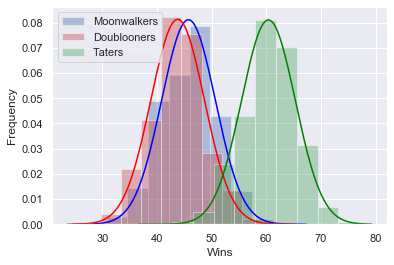

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def simseason(ng = 10, pw = 0.4, pd = 0.2, pt = 0.1):
#Simulate a season of ng games, with probabilities pw, pd, and pt identifying
#probabilities of moonwalkers walk, doubloonds double, taters home run

    wm = 0; wd = 0; wt = 0
    for i in range(ng):
        #simulate moonwalker vs doubloons
        hm = 0; hd = 0; j = 0
        while (j < 9) and (hm == hd): #check that innings are < 9 and no ties
            out = 0; b = 0
            while out < 3:
                if np.random.rand() < pw:
                    b += 1
                else:
                    out +=1
            hm += max(0,b-3) #convert walks to hits
            out = 0; b = 0
            while out < 3:
                if np.random.rand() < pd:
                    b += 1
                else:
                    out +=1
            hd += max(0,b-1) #convert doubles to hits
        if hm < hd:
            wd += 1
        else:
            wm += 1

        #simulate moonwalker vs taters
        hm = 0; ht = 0; j = 0
        while (j < 9) and (hm == ht): #check that innings are < 9 and no ties
            out = 0; b = 0
            while out < 3:
                if np.random.rand() < pw:
                    b += 1
                else:
                    out +=1
            hm += max(0,b-3) #convert walks to hits
            out = 0; b = 0
            while out < 3:
                if np.random.rand() < pt:
                    b += 1
                else:
                    out +=1
            ht += b #home runs are hits
        if hm < ht:
            wt += 1
        else:
            wm += 1

        #simulate taters vs doubloons
        ht = 0; hd = 0; j = 0
        while (j < 9) and (ht == hd): #check that innings are < 9 and no ties
            out = 0; b = 0
            while out < 3:
                if np.random.rand() < pt:
                    b += 1
                else:
                    out +=1
            ht += max(0,b) #home runs are hits
            out = 0; b = 0
            while out < 3:
                if np.random.rand() < pd:
                    b += 1
                else:
                    out +=1
            hd += max(0,b-1) #convert doubles to hits
        if ht < hd:
            wd += 1
        else:
            wt += 1

    return [wm,wd,wt]

res=np.array([])
nits=10000
ng=100
res=np.zeros(shape=(nits,3))
for i in range(nits):
    res[i,:]=simseason(ng=ng//2)  #must divide by 2 to account for two games per team


sns.set()
ax = sns.distplot(res[:,0],label='Moonwalkers',bins=10,fit=norm,kde=False,fit_kws={"color":"blue"},color="b")
ax = sns.distplot(res[:,1],label='Doublooners',bins=10,fit=norm,kde=False,fit_kws={"color":"red"},color="r")
ax = sns.distplot(res[:,2],label='Taters',bins=10,fit=norm,kde=False,fit_kws={"color":"green"},color="g")
ax.legend()
ax.set_ylabel('Frequency')
ax.set_xlabel('Wins')